•Dataset – MovieLensDataset (100k)

•100k movie ratings data

•From MovieLens

•9000 movies rated by 600 users

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('ratings.csv')

In [4]:
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
data.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

**From the result above, rating 4 is the highest**

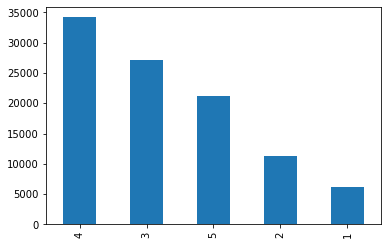

In [6]:
#Plotting bar chart showing ratings information
data.rating.value_counts().plot(kind='bar')
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
#Check if there is any NULL values in the dataset
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
data = data.iloc[:, :-1]

In [10]:
data.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [11]:
#Import the Reader Class – parse a file containing ratings
#rating_scale by default is 1 to 5, (1,5)
#reader = Reader(rating_scale=(1,10)) if the rating from 1 to 10

from surprise import Reader, Dataset
#from surprise.model_selection import cross_validate  > not required , just information
reader = Reader()
data = Dataset.load_from_df(data[['userId','movieId', 'rating']], reader)

In [12]:
#Train/Test split
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25)

In [13]:
#fitting training set
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [ ]:
#CV MEANS CROSS VALIDATION
#verbose=false meaning that we dont want long data

from surprise import SVD, accuracy
algo = SVD()
#algo.fit(trainset)
results = cross_validate(algo, data, measures=['RMSE'], cv=10, verbose=False)
#tmp = pd.DataFrame.from_dict(results).mean(axis=0)
#tmp
results

In [ ]:
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp

In [14]:
#Predicting using test set
predictions = algo.test(testset)

In [15]:
#Calculate accuracy
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9447


0.9446900133355223

In [16]:
predictions

[Prediction(uid=554, iid=378, r_ui=4.0, est=3.699591174088858, details={'was_impossible': False}),
 Prediction(uid=216, iid=56, r_ui=5.0, est=4.513321159495185, details={'was_impossible': False}),
 Prediction(uid=239, iid=47, r_ui=2.0, est=4.873183312617605, details={'was_impossible': False}),
 Prediction(uid=521, iid=597, r_ui=2.0, est=2.3394267116230227, details={'was_impossible': False}),
 Prediction(uid=280, iid=11, r_ui=5.0, est=4.112181342007157, details={'was_impossible': False}),
 Prediction(uid=368, iid=288, r_ui=3.0, est=3.62820686461043, details={'was_impossible': False}),
 Prediction(uid=790, iid=22, r_ui=5.0, est=3.9231669024928033, details={'was_impossible': False}),
 Prediction(uid=454, iid=293, r_ui=4.0, est=2.9798524330962675, details={'was_impossible': False}),
 Prediction(uid=518, iid=284, r_ui=4.0, est=3.4229925085767, details={'was_impossible': False}),
 Prediction(uid=145, iid=452, r_ui=3.0, est=2.9354294984443365, details={'was_impossible': False}),
 Prediction(u